# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
rng = np.random

In [3]:
print(f"Tensorflow version installed {tf.__version__}")

Tensorflow version installed 2.9.3


In [4]:
print(rng)

<module 'numpy.random' from 'c:\\Users\\erkun\\anaconda3\\envs\\tf\\lib\\site-packages\\numpy\\random\\__init__.py'>


In [5]:
rng.randn()

0.6864175193733972

In [6]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [7]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


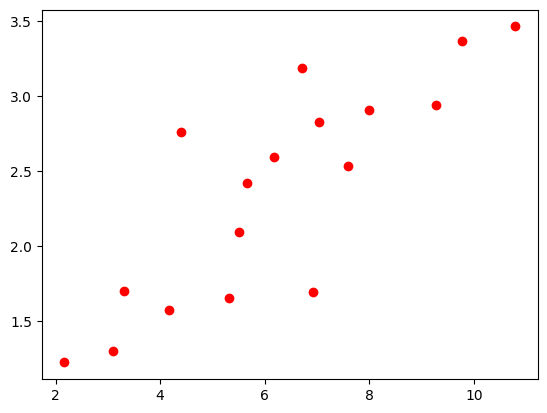

In [8]:
%matplotlib inline
plt.plot(X,Y,'ro', label='Original data')
plt.show()

In [9]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [10]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [11]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.300243, W: 0.405017, b: -0.288607
step: 100, loss: 0.268657, W: 0.387464, b: -0.164169
step: 150, loss: 0.243886, W: 0.371921, b: -0.053970
step: 200, loss: 0.224460, W: 0.358156, b: 0.043617
step: 250, loss: 0.209226, W: 0.345966, b: 0.130038
step: 300, loss: 0.197279, W: 0.335171, b: 0.206568
step: 350, loss: 0.187909, W: 0.325611, b: 0.274341
step: 400, loss: 0.180562, W: 0.317146, b: 0.334358
step: 450, loss: 0.174800, W: 0.309649, b: 0.387507
step: 500, loss: 0.170281, W: 0.303010, b: 0.434574
step: 550, loss: 0.166737, W: 0.297131, b: 0.476254
step: 600, loss: 0.163958, W: 0.291925, b: 0.513165
step: 650, loss: 0.161779, W: 0.287314, b: 0.545852
step: 700, loss: 0.160070, W: 0.283231, b: 0.574799
step: 750, loss: 0.158729, W: 0.279615, b: 0.600432
step: 800, loss: 0.157678, W: 0.276413, b: 0.623133
step: 850, loss: 0.156854, W: 0.273578, b: 0.643236
step: 900, loss: 0.156207, W: 0.271067, b: 0.661038
step: 950, loss: 0.155700, W: 0.268843, b: 0.676803
step: 1000

In [12]:
import matplotlib.pyplot as plt

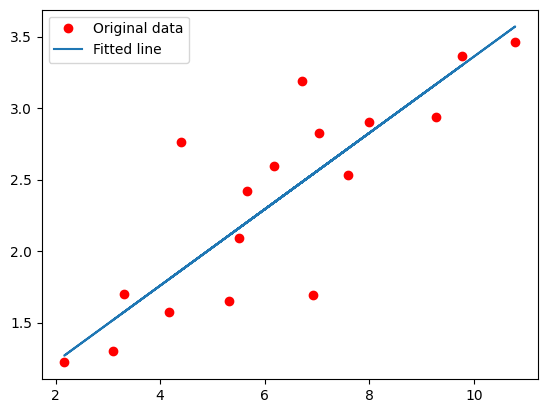

In [13]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()